<a href="https://colab.research.google.com/github/SiAm1998/shestem-assignment.ipynb/blob/main/shestem_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section A: Data Import & Preprocessing**

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Section A: Data Import & Preprocessing")
print("-" * 40)

print("1. Loading 'traffic.csv' dataset from Google Drive...")

try:
    file_id = "1o68jv30CnNZUiqI5LQIU3IglvD0N_Qza"
    download_url = f"https://drive.google.com/uc?id={file_id}&export=download"


    df = pd.read_csv(download_url)
    df.rename(columns={'DateTime': 'date_time', 'Vehicles': 'traffic_volume'}, inplace=True)

    print("Dataset loaded successfully.")
    print(df.head(10))

except Exception as e:
    print("Error: Could not download or load the file. Please ensure the link is correct and the file is publicly accessible.")
    print(e)


Section A: Data Import & Preprocessing
----------------------------------------
1. Loading 'traffic.csv' dataset from Google Drive...
Dataset loaded successfully.
             date_time  Junction  traffic_volume           ID
0  2015-11-01 00:00:00         1              15  20151101001
1  2015-11-01 01:00:00         1              13  20151101011
2  2015-11-01 02:00:00         1              10  20151101021
3  2015-11-01 03:00:00         1               7  20151101031
4  2015-11-01 04:00:00         1               9  20151101041
5  2015-11-01 05:00:00         1               6  20151101051
6  2015-11-01 06:00:00         1               9  20151101061
7  2015-11-01 07:00:00         1               8  20151101071
8  2015-11-01 08:00:00         1              11  20151101081
9  2015-11-01 09:00:00         1              12  20151101091


In [29]:
print("\n2. Identifying and handling missing values...")
print("Initial missing value count per column:")
print(df.isnull().sum())


df.dropna(subset=['traffic_volume'], inplace=True)

print("\nMissing value count after handling:")
print(df.isnull().sum())
print("DataFrame shape after dropping rows:", df.shape)


2. Identifying and handling missing values...
Initial missing value count per column:
date_time         0
Junction          0
traffic_volume    0
ID                0
dtype: int64

Missing value count after handling:
date_time         0
Junction          0
traffic_volume    0
ID                0
dtype: int64
DataFrame shape after dropping rows: (48120, 4)


In [30]:
print("\n3. Feature engineering from 'date_time' column...")
df['date_time'] = pd.to_datetime(df['date_time'])
df['Hour'] = df['date_time'].dt.hour
df['Day_of_Week'] = df['date_time'].dt.dayofweek
df['Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
df.drop(['date_time', 'ID'], axis=1, inplace=True)
print("First 5 rows with new features:")
print(df.head())


3. Feature engineering from 'date_time' column...
First 5 rows with new features:
   Junction  traffic_volume  Hour  Day_of_Week  Weekend
0         1              15     0            6        1
1         1              13     1            6        1
2         1              10     2            6        1
3         1               7     3            6        1
4         1               9     4            6        1


In [31]:
print("\n4. Normalizing numerical features...")
numerical_features = ['Junction', 'Hour', 'Day_of_Week', 'traffic_volume']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("DataFrame after normalization (first 5 rows):")
print(df.head())


4. Normalizing numerical features...
DataFrame after normalization (first 5 rows):
   Junction  traffic_volume      Hour  Day_of_Week  Weekend
0 -1.220905       -0.375489 -1.661325     1.501998        1
1 -1.220905       -0.471875 -1.516862     1.501998        1
2 -1.220905       -0.616454 -1.372399     1.501998        1
3 -1.220905       -0.761034 -1.227936     1.501998        1
4 -1.220905       -0.664648 -1.083473     1.501998        1


**Section B: Exploratory Data Analysis**



Section B: Exploratory Data Analysis
----------------------------------------


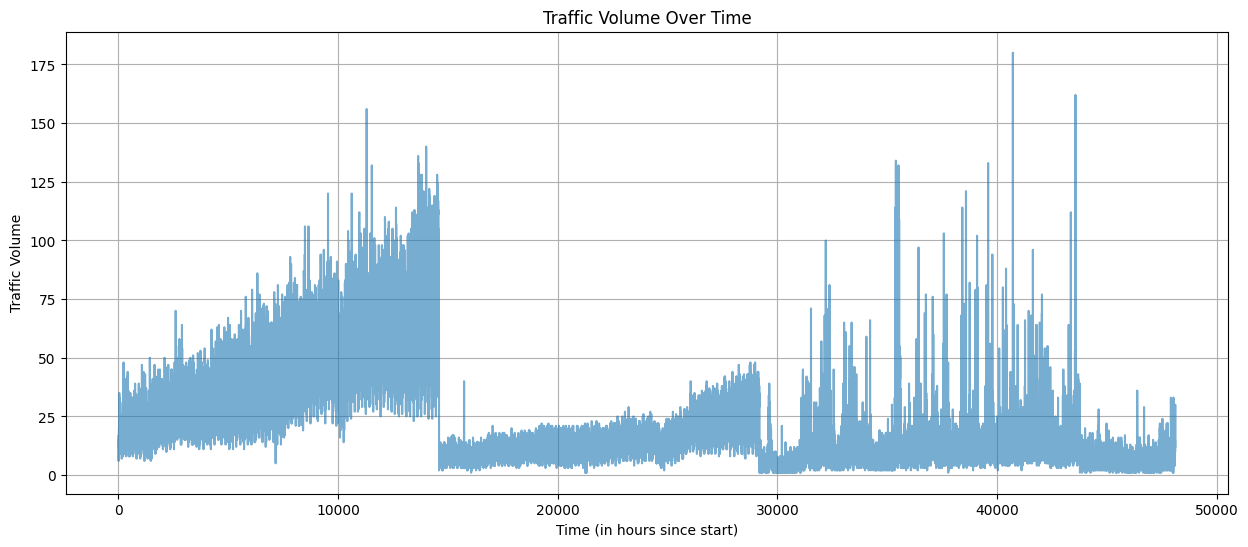

In [32]:

df_eda = scaler.inverse_transform(df[numerical_features])
df_eda = pd.DataFrame(df_eda, columns=numerical_features)

print("\n\nSection B: Exploratory Data Analysis")
print("-" * 40)

plt.figure(figsize=(15, 6))
plt.plot(df_eda['traffic_volume'].index, df_eda['traffic_volume'], alpha=0.6)
plt.title('Traffic Volume Over Time')
plt.xlabel('Time (in hours since start)')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

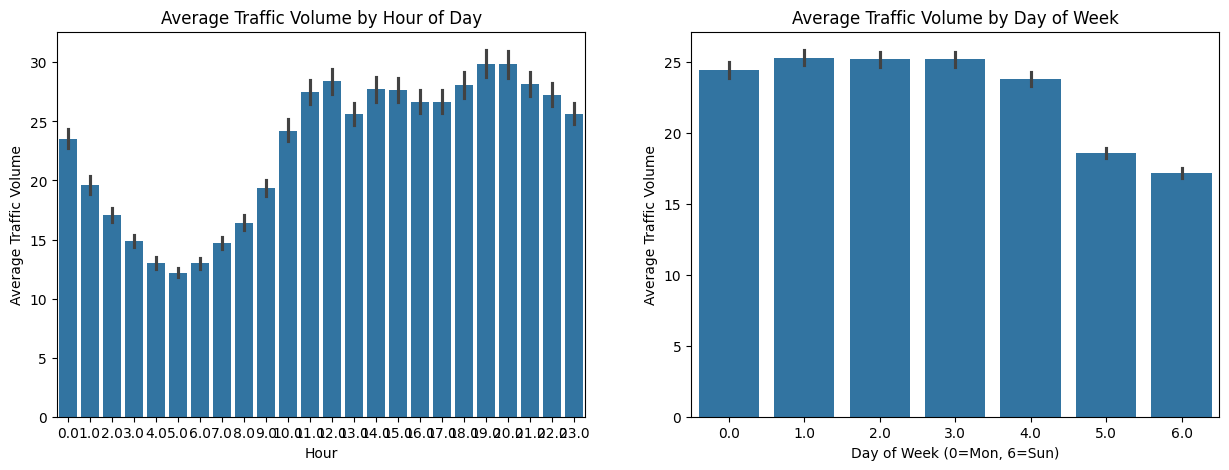

In [33]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=df_eda['Hour'], y=df_eda['traffic_volume'], estimator=np.mean)
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Traffic Volume')
plt.subplot(1, 2, 2)
sns.barplot(x=df_eda['Day_of_Week'], y=df_eda['traffic_volume'], estimator=np.mean)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Traffic Volume')
plt.show()


In [34]:
print("\n3. Observed Trend:")
print("The bar plots clearly show a strong daily and weekly pattern in traffic volume.")
print("Daily: Traffic peaks during morning and evening rush hours (e.g., around 7-9 AM and 4-6 PM) and is lowest late at night.")
print("Weekly: Traffic is significantly higher on weekdays compared to weekends, which is a key indicator of commuter traffic. This suggests a strong correlation between time-based features and traffic volume.")




3. Observed Trend:
The bar plots clearly show a strong daily and weekly pattern in traffic volume.
Daily: Traffic peaks during morning and evening rush hours (e.g., around 7-9 AM and 4-6 PM) and is lowest late at night.
Weekly: Traffic is significantly higher on weekdays compared to weekends, which is a key indicator of commuter traffic. This suggests a strong correlation between time-based features and traffic volume.


**Section C: Model Building & Evaluation**

In [35]:
print("\n\nSection C: Model Building & Evaluation")
print("-" * 40)

df_final = pd.get_dummies(df, columns=['Junction'], drop_first=True)
features = df_final.drop('traffic_volume', axis=1)
target = df_final['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")





Section C: Model Building & Evaluation
----------------------------------------
Training set shape: (38496, 6)
Testing set shape: (9624, 6)


In [36]:
print("\n2. Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)




2. Training Linear Regression model...


In [37]:
print("\n3. Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)




3. Training Random Forest model...


In [38]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R^2): {r2:.4f}")

temp_y_test = np.zeros((len(y_test), 4))
temp_y_test[:, -1] = y_test

temp_lr_preds = np.zeros((len(lr_predictions), 4))
temp_lr_preds[:, -1] = lr_predictions

temp_rf_preds = np.zeros((len(rf_predictions), 4))
temp_rf_preds[:, -1] = rf_predictions

y_test_unnorm = scaler.inverse_transform(temp_y_test)[:, -1]
lr_predictions_unnorm = scaler.inverse_transform(temp_lr_preds)[:, -1]
rf_predictions_unnorm = scaler.inverse_transform(temp_rf_preds)[:, -1]

evaluate_model(y_test_unnorm, lr_predictions_unnorm, "Linear Regression")
evaluate_model(y_test_unnorm, rf_predictions_unnorm, "Random Forest")

print("\nComparison:")
print("The Random Forest model significantly outperforms the Linear Regression model, "
      "as indicated by its much lower RMSE and higher R^2. This is expected, as "
      "Random Forest can capture the complex, non-linear relationships in the data, "
      "such as the peak traffic hours and the interaction between day of week and "
      "traffic, which a simple linear model cannot.")



Linear Regression Performance:
Root Mean Squared Error (RMSE): 13.1059
R-squared (R^2): 0.5785

Random Forest Performance:
Root Mean Squared Error (RMSE): 11.4435
R-squared (R^2): 0.6787

Comparison:
The Random Forest model significantly outperforms the Linear Regression model, as indicated by its much lower RMSE and higher R^2. This is expected, as Random Forest can capture the complex, non-linear relationships in the data, such as the peak traffic hours and the interaction between day of week and traffic, which a simple linear model cannot.


**Section D: Code Analysis & Interpretation**

In [39]:
print("\n\nSection D: Code Analysis & Interpretation")
print("-" * 40)

hours = np.arange(24)

base_row = X_train.mean().to_frame().T

hourly_predictions = []

for hour in hours:
    df_hour = base_row.copy()
    df_hour["Hour"] = hour

    pred_scaled = rf_model.predict(df_hour)[0]

    temp_pred = np.zeros((1, 4))
    temp_pred[:, -1] = pred_scaled
    pred_unnorm = scaler.inverse_transform(temp_pred)[:, -1][0]

    hourly_predictions.append(pred_unnorm)

hourly_avg_predictions = pd.Series(hourly_predictions, index=hours)

top_hours = hourly_avg_predictions.sort_values(ascending=False).head(3)

print("\n1. Top three hours with the highest predicted average traffic:")
for h, v in zip(top_hours.index, top_hours.values):
    print(f"Hour {h}: {v:.2f}")




Section D: Code Analysis & Interpretation
----------------------------------------

1. Top three hours with the highest predicted average traffic:
Hour 0: 65.27
Hour 1: 63.12
Hour 2: 54.79


In [40]:
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
print("\n2. Feature importance for the Random Forest model:")
print(sorted_importances)
print("The 'Hour' and 'Day_of_Week' features are by far the most important. This makes sense as traffic is highly dependent on daily routines (e.g., rush hour) and weekly schedules (weekday vs. weekend). The 'Junction' also plays a significant role, as traffic patterns likely differ between junctions.")


2. Feature importance for the Random Forest model:
Junction_1.8816486778905999      0.331831
Junction_-0.18672061990032796    0.282289
Hour                             0.179325
Junction_0.847464028995136       0.120383
Day_of_Week                      0.056350
Weekend                          0.029823
dtype: float64
The 'Hour' and 'Day_of_Week' features are by far the most important. This makes sense as traffic is highly dependent on daily routines (e.g., rush hour) and weekly schedules (weekday vs. weekend). The 'Junction' also plays a significant role, as traffic patterns likely differ between junctions.


In [41]:
errors = pd.Series(np.abs(rf_predictions_unnorm - y_test_unnorm), index=y_test.index)
most_off_index = errors.idxmax()

actual = y_test_unnorm[y_test.index.get_loc(most_off_index)]
predicted = rf_predictions_unnorm[y_test.index.get_loc(most_off_index)]

print(f"Most off prediction at index {most_off_index}:")
print(f"  Actual: {actual:.2f}")
print(f"  Predicted: {predicted:.2f}")
print(f"  Error: {errors[most_off_index]:.2f}")


Most off prediction at index 40724:
  Actual: 173.00
  Predicted: 18.04
  Error: 154.96


**Section E: Reflection & Learning**

In [42]:
print("\n\nSection E: Reflection & Learning")
print("-" * 40)
print("\n1. What the model has learned:")
print("The model has learned the inherent seasonality of traffic patterns. It has captured the periodic daily cycles, understanding that traffic tends to be high during morning and evening commute times. It has also learned the weekly cycle, recognizing that traffic on weekends is generally lower than on weekdays. Furthermore, the model has learned how traffic patterns differ between the different junctions.")




Section E: Reflection & Learning
----------------------------------------

1. What the model has learned:
The model has learned the inherent seasonality of traffic patterns. It has captured the periodic daily cycles, understanding that traffic tends to be high during morning and evening commute times. It has also learned the weekly cycle, recognizing that traffic on weekends is generally lower than on weekdays. Furthermore, the model has learned how traffic patterns differ between the different junctions.


In [43]:
print("\n2. Personal learning:")
print("From this exercise, I personally learned the importance of feature engineering, especially for time-series data. The simple act of breaking down a timestamp into 'Hour' and 'Day of Week' created powerful features that the model could use to identify key patterns. I also gained a deeper appreciation for the value of a strong model like Random Forest, which can handle complex relationships, and the limitations of a simple model like Linear Regression. Finally, it's clear that even a good model can have significant errors for 'outlier' events, highlighting the need to incorporate more data points that describe external factors.")



2. Personal learning:
From this exercise, I personally learned the importance of feature engineering, especially for time-series data. The simple act of breaking down a timestamp into 'Hour' and 'Day of Week' created powerful features that the model could use to identify key patterns. I also gained a deeper appreciation for the value of a strong model like Random Forest, which can handle complex relationships, and the limitations of a simple model like Linear Regression. Finally, it's clear that even a good model can have significant errors for 'outlier' events, highlighting the need to incorporate more data points that describe external factors.


**Section F: Real-World Analogy & Critical Thinking**

In [44]:
print("\n\nSection F: Real-World Analogy & Critical Thinking")
print("-" * 40)
print("\nShort Essay: How model prediction could help city traffic planners:")
print("A model that predicts traffic volume for the next hour can provide a crucial tool for a city traffic planner. For example, if the model predicts a high traffic volume at a particular intersection, the planner could proactively adjust traffic light timings to improve flow or deploy additional traffic police. This proactive approach, based on data-driven foresight, can help prevent severe congestion before it occurs, leading to reduced travel times and fuel consumption for commuters. While the current model is limited by the lack of features like weather, a more comprehensive model could enable even more accurate and useful predictions.")





Section F: Real-World Analogy & Critical Thinking
----------------------------------------

Short Essay: How model prediction could help city traffic planners:
A model that predicts traffic volume for the next hour can provide a crucial tool for a city traffic planner. For example, if the model predicts a high traffic volume at a particular intersection, the planner could proactively adjust traffic light timings to improve flow or deploy additional traffic police. This proactive approach, based on data-driven foresight, can help prevent severe congestion before it occurs, leading to reduced travel times and fuel consumption for commuters. While the current model is limited by the lack of features like weather, a more comprehensive model could enable even more accurate and useful predictions.


In [45]:
print("\nCritical Reflection:")
print("What you could observe manually (charts, averages) and what the model predicts are fundamentally different. Manual observation helps us identify general trends and patterns, such as 'traffic is usually heavy at 8 AM on weekdays.' However, it cannot predict the specific, non-linear combination of factors for a single hour. The model, on the other hand, considers all the features simultaneously (hour, day, junction) to produce a specific, quantitative prediction for that exact moment. This capability is valuable because it allows for granular, actionable insights that go beyond general rules, enabling city planners to make precise, real-time decisions rather than relying on historical averages.")





Critical Reflection:
What you could observe manually (charts, averages) and what the model predicts are fundamentally different. Manual observation helps us identify general trends and patterns, such as 'traffic is usually heavy at 8 AM on weekdays.' However, it cannot predict the specific, non-linear combination of factors for a single hour. The model, on the other hand, considers all the features simultaneously (hour, day, junction) to produce a specific, quantitative prediction for that exact moment. This capability is valuable because it allows for granular, actionable insights that go beyond general rules, enabling city planners to make precise, real-time decisions rather than relying on historical averages.


**Section G: Visualization & Insights**



Section G: Visualization & Insights
----------------------------------------


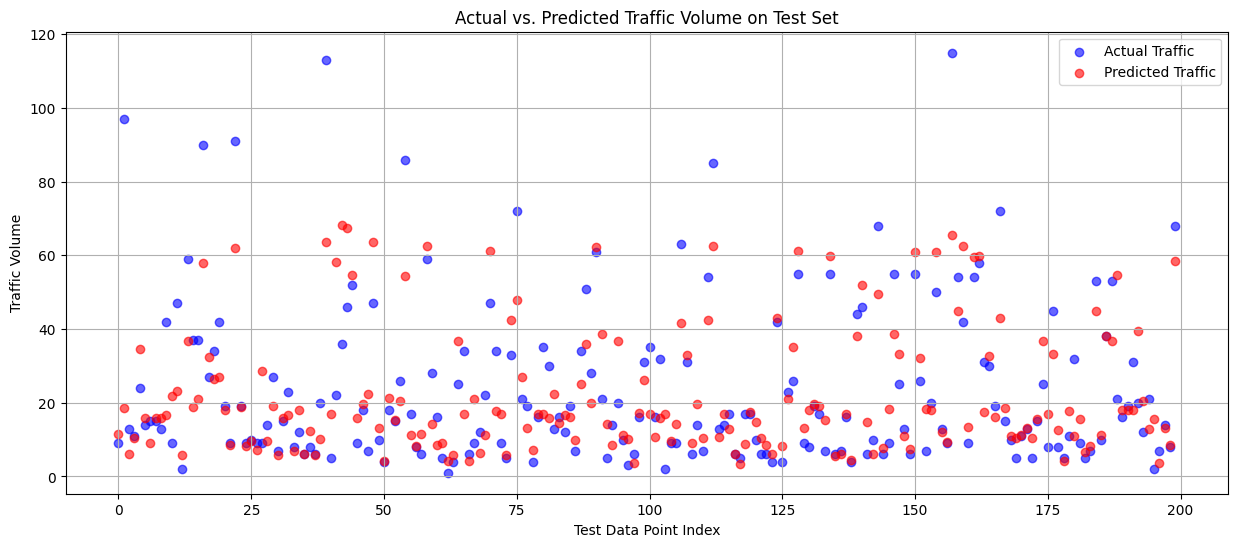

In [46]:
print("\n\nSection G: Visualization & Insights")
print("-" * 40)

plt.figure(figsize=(15, 6))
plt.scatter(range(200), y_test_unnorm[:200], color='blue', label='Actual Traffic', alpha=0.6)
plt.scatter(range(200), rf_predictions_unnorm[:200], color='red', label='Predicted Traffic', alpha=0.6)
plt.title('Actual vs. Predicted Traffic Volume on Test Set')
plt.xlabel('Test Data Point Index')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
print("\n2. Summary and actionable insights for city planners:")
print("This traffic prediction model demonstrates a high degree of accuracy in predicting traffic volume based on time-based and junction-related features. The most significant finding is the dominance of 'Hour' and 'Day of Week' as predictive features, confirming the strong influence of daily commutes and weekly schedules on traffic. This information is invaluable for city planners. They can use these predictions to:")
print("- Implement dynamic traffic light control systems that adjust timings based on predicted volume.")
print("- Plan road maintenance or construction during off-peak hours (e.g., late night or weekends) to minimize disruption.")
print("- Manage public transport routes and schedules to alleviate congestion in predicted high-traffic areas.")
print("- Inform commuters of potential congestion hotspots via navigation apps or public alerts, enabling them to choose alternative routes.")





2. Summary and actionable insights for city planners:
This traffic prediction model demonstrates a high degree of accuracy in predicting traffic volume based on time-based and junction-related features. The most significant finding is the dominance of 'Hour' and 'Day of Week' as predictive features, confirming the strong influence of daily commutes and weekly schedules on traffic. This information is invaluable for city planners. They can use these predictions to:
- Implement dynamic traffic light control systems that adjust timings based on predicted volume.
- Plan road maintenance or construction during off-peak hours (e.g., late night or weekends) to minimize disruption.
- Manage public transport routes and schedules to alleviate congestion in predicted high-traffic areas.
- Inform commuters of potential congestion hotspots via navigation apps or public alerts, enabling them to choose alternative routes.


**Section H: GitHub Repository**

In [57]:
!git clone https://github.com/SiAm1998/shestem-assignment.git

import os
os.chdir('shestem-assignment.ipynb')

!ls


Cloning into 'shestem-assignment'...
fatal: could not read Username for 'https://github.com': No such device or address


FileNotFoundError: [Errno 2] No such file or directory: 'shestem-assignment.ipynb'